## Hashtag Relationships

Load extrated data

In [24]:
%run tweet_extraction.ipynb

In [26]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib

Extraindo as hashtags e guardando em uma lista

In [27]:
data = df_tweets.hashtags.apply(lambda x: np.nan if len(x) <= 0 else x)
hashtags = list(data.dropna())
#hashtags

Aplica o algoritmo apriori, que retorna os itens frequentes na lista de hashtags. O parâmetro min_suport (0-1) "regula" o quanto um item é considerado "frequente" na lista.

In [28]:
te = TransactionEncoder()
te_ary = te.fit(hashtags).transform(hashtags)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.026, use_colnames=True)

frequent_itemsets

,support,itemsets
0,0.034483,(Barbacena)
1,0.603448,(COVID__19)
2,0.034483,(Covid)
3,0.586207,(apocalipse)
4,0.034483,(atualização)
...,...,...
133,0.034483,"(corona, vidabesta, coronavirus, quarentena, p..."
134,0.034483,"(corona, vidabesta, quarentena, pandemia, bomd..."
135,0.034483,"(vidabesta, coronavirus, quarentena, pandemia,..."
136,0.034483,"(corona, vidabesta, coronavirus, quarentena, p..."


Aplicando associação usando "metric=confidence" (Fornece a probabilidade do consequente em uma transação, dada a presença de antecedente)

In [29]:
#rules=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

Aplicando associação usando "metric=lift" (Dado que antecedentes e consequentes são independentes, com que frequência eles se juntam)

In [30]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.antecedents = rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents = rules.consequents.apply(lambda x: next(iter(x)))
#rules

Usando NetworkX para construir um gráfico para verificar a associação entre antecedentes e consequentes obtidos após a regra de associação aplicada.

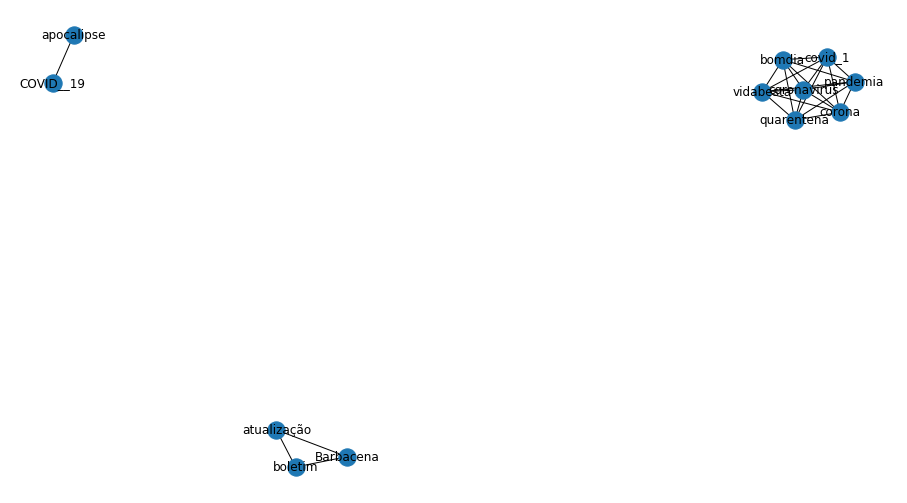

In [31]:
fig, ax=plt.subplots(figsize=(16,9))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)

plt.show()

Testando os parâmetros para melhorar a visualização

https://networkx.github.io/documentation/networkx-1.10/reference/drawing.html

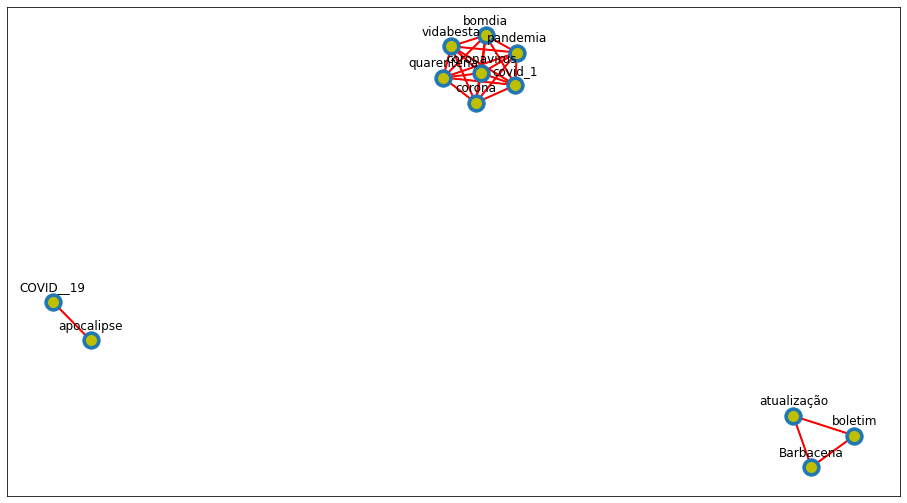

In [43]:
fig, ax=plt.subplots(figsize=(16,9))

GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')

pos = nx.spring_layout(GA)

nx.draw_networkx(GA,pos,with_labels=False)

###### coloca label fora do node
pos_higher = {}
y_off = 0.04

for k, v in pos.items():
    pos_higher[k] = (v[0], v[1]+y_off)
#######

nx.draw_networkx_edges(GA, pos, edgelist=None, width=2.0, edge_color='R', style='solid', alpha=1.0, edge_cmap=None, edge_vmin=None, edge_vmax=None, ax=None, arrows=True, label=None)

# nx.draw_networkx_labels(GA, pos, labels=None, font_size=12, font_color='k', font_family='sans-serif', font_weight='normal', alpha=1.0, bbox=None, ax=None)

nx.draw_networkx_nodes(GA, pos, nodelist=None, node_size=100, node_color='y', node_shape='o', alpha=1.0, cmap=None, vmin=None, vmax=None, ax=None, linewidths=None, label=None)

text = nx.draw_networkx_labels(GA,pos_higher)

for _,t in text.items():
    t.set_rotation('horizontal')   